# Project 2 - Pandas & Visualization 101

---

- Your Name Here: Nik Baldis
- WFU Email Address: baldnj23@wfu.edu
- Submission Date: 07/23/23

# Instructions

1. Download the notebook `pandas_viz_101_yournamehere.ipynb` and the dataset `AmazonReviews.json` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. This is a simple project made up of mini-tasks. Simply write the code to answer the question, and be sure to display your results!

5. Please submit your notebook in **HTML** on Canvas.

# Amazon Reviews

The `AmazonReviews.json` dataset contains over 370,000 reviews of products in Beauty and Personal Care. The data was initially scraped, munged and prepped by Jianno Ni (https://nijianmo.github.io/) an NLP researcher/engineer at Google.


Your challenge is to further prepare the data (easy), create summaries and charts answering various questions about the data (also easy). To complete this project, please follow these steps:

## Step 0. Load Libraries

Load the following libraries, you may need to install them first.
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1. Stage

1. Use `pd.read_json()` from `pandas` to read in `AmazonReviews.json` data file, store it as a new data frame called `"df_review"`

2. Display the first 7 records

3. Check the shape and data types using `info()`

In [ ]:
df_review = pd.read_json('/content/AmazonReviews-1.json')
df_review

,reviewerID,reviewerName,reviewTime,itemID,reviewText,overallRating,summary,verified
0,A1V6B6TNIC10QE,theodore j bigham,"02 19, 2015",0143026860,great,1,One Star,True
1,A2F5GHSXFQ0W6J,Mary K. Byke,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,... to reading about the Negro Baseball and th...,True
2,A1572GUYS7DGSR,David G,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,Worth the Read,True
3,A1PSGLFK1NSVO,TamB,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,Good Read,True
4,A6IKXKZMTKGSC,shoecanary,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,"More than facts, a good story read!",True
...,...,...,...,...,...,...,...,...
371340,A202DCI7TV1022,Sam,"07 20, 2017",B01HJEGTYK,It was awful. It was super frizzy and I tried ...,1,It was super frizzy and I tried to comb it and...,True
371341,A3FSOR5IJOFIBE,TYW,"03 16, 2017",B01HJEGTYK,I was skeptical about buying this. Worried it...,5,Awesome,True
371342,A1B5DK6CTP2P24,Norma Jennings,"03 1, 2017",B01HJEGTYK,Makes me look good fast.,5,Five Stars,True
371343,A23OUYS5IRMJS9,Lee,"02 21, 2017",B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,2,Ok but color way off and volume as well,True


In [ ]:
df_review.head(7)

,reviewerID,reviewerName,reviewTime,itemID,reviewText,overallRating,summary,verified
0,A1V6B6TNIC10QE,theodore j bigham,"02 19, 2015",0143026860,great,1,One Star,True
1,A2F5GHSXFQ0W6J,Mary K. Byke,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,... to reading about the Negro Baseball and th...,True
2,A1572GUYS7DGSR,David G,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,Worth the Read,True
3,A1PSGLFK1NSVO,TamB,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,Good Read,True
4,A6IKXKZMTKGSC,shoecanary,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,"More than facts, a good story read!",True
5,A36NF437WZLQ9E,W. Powell,"02 26, 2010",0143026860,Today I gave a book about the Negro Leagues of...,5,The Gift of Black Baseball,False
6,A10Q8NIFOVOHFV,Robert S. Clay Jr.,"03 7, 2001",0143026860,The story of race relations in American histor...,4,"Baseball, America, and racism.",False


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewerID     371345 non-null  object
 1   reviewerName   371307 non-null  object
 2   reviewTime     371345 non-null  object
 3   itemID         371345 non-null  object
 4   reviewText     370946 non-null  object
 5   overallRating  371345 non-null  int64 
 6   summary        371139 non-null  object
 7   verified       371345 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 20.2+ MB


## Step 2. Structure & Transform (Part I)

Applying data cleaning methods to the dataset `df_review`:

1. Summarize NAs: Report the **number** and **percentage** of missing values for each column

2. Clean NAs: Drop any rows where `reviewText` is None

3. Drop the columns of `summary` and `reviewerName`

4. Double-check NAs: Given the processed data, double check the **number** and **percentage** of missing values for each column
> Hint: There sholud be no NAs anymore

5. Explore the column of `verified`, report the percentage of rows that are verified using `value_counts()`

6. Filter and keep the subset of data where`verified==True`. Store this as a new data frame `df_review_prep`
> Hint: There should be 322098 rows

In [ ]:
df_review.isna().sum()

reviewerID         0
reviewerName      38
reviewTime         0
itemID             0
reviewText       399
overallRating      0
summary          206
verified           0
dtype: int64

In [ ]:
df_review.isna().sum()/df_review.shape[0]*100

reviewerID       0.000000
reviewerName     0.010233
reviewTime       0.000000
itemID           0.000000
reviewText       0.107447
overallRating    0.000000
summary          0.055474
verified         0.000000
dtype: float64

In [ ]:
#test clean NAs
step_2_df = df_review.dropna(subset=['reviewText'])
step_2_df

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified,Date
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True,2015-02-19
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True,2014-12-18
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True,2014-08-10
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True,2013-03-11
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True,2011-12-25
...,...,...,...,...,...,...,...
371340,A202DCI7TV1022,"07 20, 2017",B01HJEGTYK,It was awful. It was super frizzy and I tried ...,1,True,2017-07-20
371341,A3FSOR5IJOFIBE,"03 16, 2017",B01HJEGTYK,I was skeptical about buying this. Worried it...,5,True,2017-03-16
371342,A1B5DK6CTP2P24,"03 1, 2017",B01HJEGTYK,Makes me look good fast.,5,True,2017-03-01
371343,A23OUYS5IRMJS9,"02 21, 2017",B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,2,True,2017-02-21


In [ ]:
#Real clean NAs
df_review.dropna(subset=['reviewText'])

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True
...,...,...,...,...,...,...
371340,A202DCI7TV1022,"07 20, 2017",B01HJEGTYK,It was awful. It was super frizzy and I tried ...,1,True
371341,A3FSOR5IJOFIBE,"03 16, 2017",B01HJEGTYK,I was skeptical about buying this. Worried it...,5,True
371342,A1B5DK6CTP2P24,"03 1, 2017",B01HJEGTYK,Makes me look good fast.,5,True
371343,A23OUYS5IRMJS9,"02 21, 2017",B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,2,True


In [ ]:
#Drop summary and reviewer name
df_review.drop(['summary','reviewerName'], axis=1, inplace=True)
#Error is because I already ran this

KeyError: ignored

In [ ]:
step_4_df_review = df_review.dropna(subset=['reviewText'])
step_4_df_review

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True
...,...,...,...,...,...,...
371340,A202DCI7TV1022,"07 20, 2017",B01HJEGTYK,It was awful. It was super frizzy and I tried ...,1,True
371341,A3FSOR5IJOFIBE,"03 16, 2017",B01HJEGTYK,I was skeptical about buying this. Worried it...,5,True
371342,A1B5DK6CTP2P24,"03 1, 2017",B01HJEGTYK,Makes me look good fast.,5,True
371343,A23OUYS5IRMJS9,"02 21, 2017",B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,2,True


In [ ]:
#Review NAs
step_4_df_review.isna().sum()

reviewerID       0
reviewTime       0
itemID           0
reviewText       0
overallRating    0
verified         0
dtype: int64

In [ ]:
#Review NAs Part 2
step_4_df_review.isna().sum()/step_4_df_review.shape[0]*100

reviewerID       0.0
reviewTime       0.0
itemID           0.0
reviewText       0.0
overallRating    0.0
verified         0.0
dtype: float64

In [ ]:
step_4_df_review['verified'].value_counts(normalize=True)

True     0.868315
False    0.131685
Name: verified, dtype: float64

In [ ]:
step_6_df_review = step_4_df_review['verified'] == True
step_4_df_review[step_6_df_review]

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True
...,...,...,...,...,...,...
371340,A202DCI7TV1022,"07 20, 2017",B01HJEGTYK,It was awful. It was super frizzy and I tried ...,1,True
371341,A3FSOR5IJOFIBE,"03 16, 2017",B01HJEGTYK,I was skeptical about buying this. Worried it...,5,True
371342,A1B5DK6CTP2P24,"03 1, 2017",B01HJEGTYK,Makes me look good fast.,5,True
371343,A23OUYS5IRMJS9,"02 21, 2017",B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,2,True


In [ ]:
df_review_prep = step_4_df_review[step_6_df_review]

In [ ]:
df_review_prep

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True
...,...,...,...,...,...,...
371340,A202DCI7TV1022,"07 20, 2017",B01HJEGTYK,It was awful. It was super frizzy and I tried ...,1,True
371341,A3FSOR5IJOFIBE,"03 16, 2017",B01HJEGTYK,I was skeptical about buying this. Worried it...,5,True
371342,A1B5DK6CTP2P24,"03 1, 2017",B01HJEGTYK,Makes me look good fast.,5,True
371343,A23OUYS5IRMJS9,"02 21, 2017",B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,2,True


In [ ]:
df_review_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322098 entries, 0 to 371344
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewerID     322098 non-null  object
 1   reviewTime     322098 non-null  object
 2   itemID         322098 non-null  object
 3   reviewText     322098 non-null  object
 4   overallRating  322098 non-null  int64 
 5   verified       322098 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 15.1+ MB


## Step 3. Structure & Transform (Part II)

Given the data frame `"df_review_prep"` we created, please further transform the data by performing the following:

1. Create binary indicators (aka flag variables or dummy variables)

- Create a flag variable "good_flag" if the `reviewText` mentions the word "good", regardless of case, set the flag to 1 else default it to 0
> There should be around 43831 references to “good”.

- Create a flag variable "great_flag" if the `reviewText` mentions the word "great", regardless of case, set the flag to 1 else default it to 0
> There should be around 62080 references to “great”.

- Create a flag variable "bad_flag", if the `reviewText` mentions the word "bad", regardless of case, set the flag to 1 else default it to 0
> There should be around 6710 references to “bad”.

> One approach to create flag variables (there are many):
```python
df['good_flag'] = 0
df['good_flag'][df['text'].str.contains('good', case=False)] = 1
```

2. Create another variable "review_len" which is the number of characters each review includes
> Hint:
```python
df['text_len'] = df['text'].str.len()
```

3. List the first 5 records of `"df_review_prep"` to make sure your code works

In [ ]:
df_review_prep['good_flag'] = 0
df_review_prep['good_flag'][df_review_prep['reviewText'].str.contains('good', case=False)] = 1

In [ ]:
df_review_prep['great_flag'] = 0
df_review_prep['great_flag'][df_review_prep['reviewText'].str.contains('great', case=False)] = 1

In [ ]:
df_review_prep['bad_flag'] = 0
df_review_prep['bad_flag'][df_review_prep['reviewText'].str.contains('bad', case=False)] = 1

In [ ]:
df_review_prep['review_len'] = df_review_prep['reviewText'].str.len()

In [ ]:
df_review_prep.head(5)

,reviewerID,reviewTime,itemID,reviewText,overallRating,verified,good_flag,great_flag,bad_flag,review_len
0,A1V6B6TNIC10QE,"02 19, 2015",0143026860,great,1,True,0,1,0,5
1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860,My husband wanted to reading about the Negro ...,4,True,0,1,0,170
2,A1572GUYS7DGSR,"08 10, 2014",0143026860,"This book was very informative, covering all a...",4,True,0,0,0,61
3,A1PSGLFK1NSVO,"03 11, 2013",0143026860,I am already a baseball fan and knew a bit abo...,5,True,0,0,0,111
4,A6IKXKZMTKGSC,"12 25, 2011",0143026860,This was a good story of the Black leagues. I ...,5,True,1,0,0,366


In [ ]:
df_review_prep['good_flag'].value_counts()

0    278267
1     43831
Name: good_flag, dtype: int64

In [ ]:
df_review_prep['great_flag'].value_counts()

0    260018
1     62080
Name: great_flag, dtype: int64

In [ ]:
df_review_prep['bad_flag'].value_counts()

0    315388
1      6710
Name: bad_flag, dtype: int64

## Step 4. Frequency Analysis & Graphs

1. Create 4 basic bar charts using `sns.countplot()` to explore `overallRating` -  set the argument `hue` (i.e., color setting) by indicated fields respectively: `None`, `good_flag`, `great_flag`, `bad_flag`.

> Hint: Expected charts can be created using code like this
```python
plt.figure(figsize=(6, 4))
factor = 'your_flag_variable'
sns.countplot(data=df, x="your_main_variable", hue=factor).set_title('your title')
plt.xlabel('your x label')
plt.ylabel('your y label')
plt.show()
```


2. To further explore `overallRating`, let's create stacked bar charts that present data as percentages. This method is particularly effective for comparing the proportion each subgroup contributes to the total.

   In a 100% stacked bar chart, each bar will represent a unique rating value (1-5 stars) under `overallRating`. The segments of each bar will illustrate the percentage of reviews at that specific rating that have been flagged as either 'good', 'great', or 'bad'.

   Let's create **three** 100% stacked bar charts - each one visualizes the relationship between `overallRating` and one of the binary flag variables respectively (`good_flag`, `great_flag`, `bad_flag`).

   **Describe** the insights or patterns you find.

> Hint: Expected charts can be created using code like this
```python
main_category = 'your_main_variable'
binary_category = 'your_flag_variable'
df_grouped = df.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.show()
```

In [ ]:
# None Chart: I thought we deleted the reviews that did not have text, so I would not be able to create a bar chart of reviews without text.
# If I am misunderstanding, or the concept is not coming to me, I accept that points will be taken off

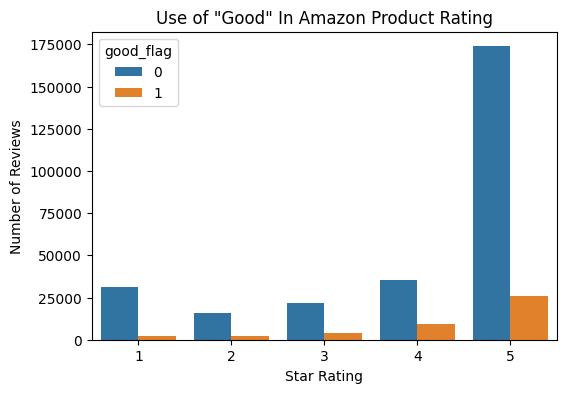

In [ ]:
# Good Chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df_review_prep, x="overallRating", hue="good_flag").set_title('Use of "Good" In Amazon Product Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

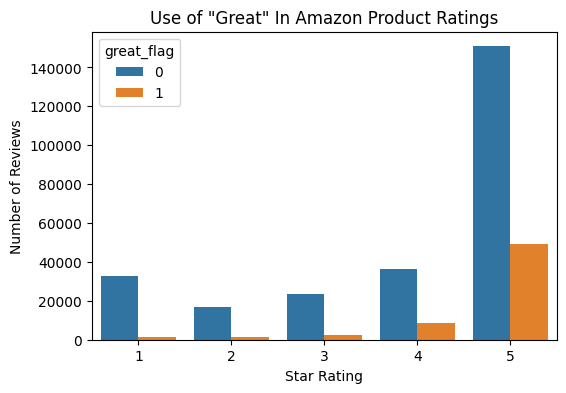

In [ ]:
# Great Flag
plt.figure(figsize=(6, 4))
sns.countplot(data=df_review_prep, x="overallRating", hue="great_flag").set_title('Use of "Great" In Amazon Product Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

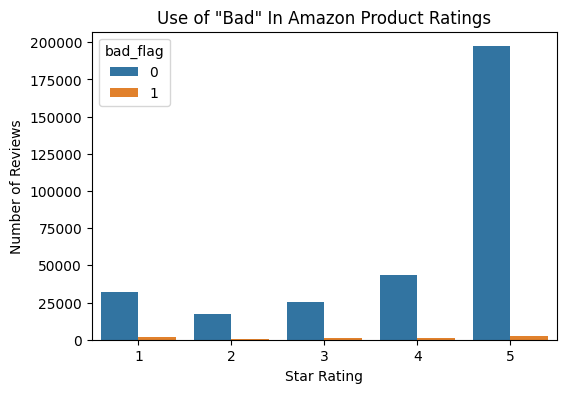

In [ ]:
# Bad Flag
plt.figure(figsize=(6, 4))
sns.countplot(data=df_review_prep, x="overallRating", hue="bad_flag").set_title('Use of "Bad" In Amazon Product Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

Bar Chart Description:  It is very hard to tell both the approximate number of reviews for each flag, as well as comparing it to the number of "misses" where the flagged phrase is not present in a review.  this is especially evident in the "Bad Flag" chart.

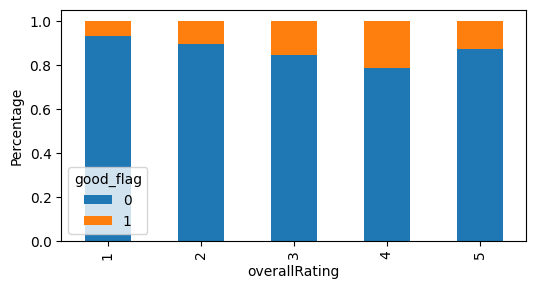

In [ ]:
# Good Flag
main_category = 'overallRating'
binary_category = 'good_flag'
df_grouped = df_review_prep.groupby('overallRating')['good_flag'].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.show()

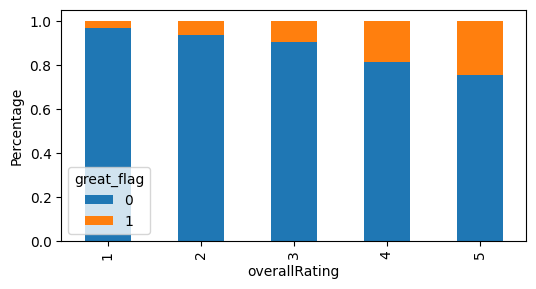

In [ ]:
# Great Flag
main_category = 'overallRating'
binary_category = 'great_flag'
df_grouped = df_review_prep.groupby('overallRating')['great_flag'].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.show()

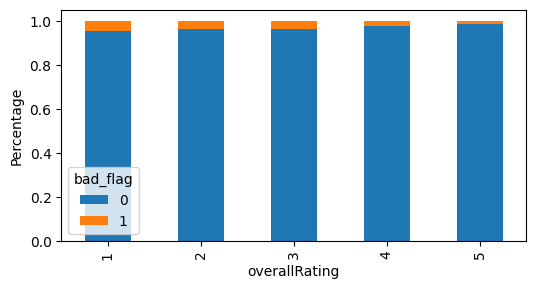

In [ ]:
# Bad Flag
main_category = 'overallRating'
binary_category = 'bad_flag'
df_grouped = df_review_prep.groupby('overallRating')['bad_flag'].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.show()

Description:  The stacked bar charts make it much easier to visualize the impact of the words on the reviews, compared to the basic bar charts.

## Step 5. Does Time Matter?

1. Clean datetimes: Change the data type of `reviewTime` to a standard type `datetime`
> Hint: Consider using `pd.to_datetime()`

2. Create 4 new variables to store the year, month, day, and day of week by applying transformation to `reviewTime`
> Hint:
```python
df['year'] = df['date_variable'].dt.year
df['month'] = df['date_variable'].dt.month
df['day'] = df['date_variable'].dt.day
df['day_of_week'] = df['date_variable'].dt.weekday # where 0 represents Monday
```

3. Group by `day_of_week`, then Report the following summaries in one single data frame named `df_summary`:
  - count the total number of reviews
  - calculate the mean of `overallRating`
  - calculate the mean of `review_len`


4. Create three Bar charts using `sns.barplot()` to answer the following questions:

- What is the most/least reviewed year?

- What year are you most likely to get the highest/lowest mean review length?

- For the data in July 2018, what day of week are you most likely to get the highest/lowest mean overall rating?

In [ ]:
df_review_prep['Date'] = pd.to_datetime(df_review_prep['reviewTime'],format="%m %d, %Y")

In [ ]:
df_review_prep['year'] = df_review_prep['Date'].dt.year
df_review_prep['month'] = df_review_prep['Date'].dt.month
df_review_prep['day'] = df_review_prep['Date'].dt.day
df_review_prep['day_of_week'] = df_review_prep['Date'].dt.weekday # where 0 represents Monday

In [ ]:
grouped_review_prep = df_review_prep.groupby('day_of_week')

In [ ]:
df_review_prep.count()

reviewerID       322098
reviewTime       322098
itemID           322098
reviewText       322098
overallRating    322098
verified         322098
good_flag        322098
great_flag       322098
bad_flag         322098
review_len       322098
Date             322098
year             322098
month            322098
day              322098
day_of_week      322098
dtype: int64

In [ ]:
grouped_review_prep['overallRating'].mean()

day_of_week
0    4.109339
1    4.113815
2    4.103758
3    4.124687
4    4.117325
5    4.105980
6    4.123041
Name: overallRating, dtype: float64

In [ ]:
grouped_review_prep['review_len'].mean()

day_of_week
0    172.393713
1    169.413881
2    173.003240
3    172.330257
4    174.571042
5    179.238157
6    175.262873
Name: review_len, dtype: float64

In [ ]:
df_summary = df_review_prep.count(),grouped_review_prep['overallRating'].mean(), grouped_review_prep['review_len'].mean()

In [ ]:
#Could Not Figure this out
df_summary = pd.DataFrame(grouped_review_prep.count(), grouped_review_prep['overallRating'].mean(),grouped_review_prep['review_len'].mean())

In [ ]:
df_summary

review_len,172.393713,169.413881,173.003240,172.330257,174.571042,179.238157,175.262873
overallRating,,,,,,,
4.109339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.113815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.103758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.124687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.117325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.105980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.123041,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Could not figure out how to create a Data frame for df_summary so that I could make a bar chart, but included the coding that I would do if the summary data frame was correct

In [ ]:
#Most/Least Reviewed Year

plt.figure(figsize=(6, 4))
sns.barplot(data= df_summary,
            x='day_of_week',
            y="overallRating",
            )
plt.title('Number of Reviews by Year')
plt.xlabel('Year ')
plt.ylabel('Number of Reviews ')
plt.show()

In [ ]:
#Highest/Lowest Length
plt.figure(figsize=(6, 4))
sns.barplot(data= df_summary,
            x='year',
            y='review_len',
            )
plt.title('Length of Reviews By Year ')
plt.xlabel('Year ')
plt.ylabel('Length of Reviews ')
plt.show()

In [ ]:
#Overall rating(July 2018)
plt.figure(figsize=(6, 4))
sns.barplot(data= df_summary[July, 2018],
            x='day_of_week',
            y='overallRating',
            )
plt.title('Overall Rating of Reviews By Day of Week ')
plt.xlabel('Year ')
plt.ylabel('Length of Reviews ')
plt.show()

For the data in July 2018, what day of week are you most likely to get the highest/lowest mean overall rating?

## Step 6. Chat with your Data

In this final step, let's build a naive chatbot that can answer simple questions about your data using a **While Loop** and **If-Else Structures**. A good reference to complete this task is [here](https://colab.research.google.com/github/MonkeyWrenchGang/PythonBootcamp/blob/main/day_3/3_4_Journey_into_WHILE_Loops.ipynb). Please follow the instructions and code the missing parts.

-  Create a greeting for the user when the chatbot starts, use the `print()` function to display it. For example:
```python
print("Hello! I am your friendly chatbot that can answer simple questions about your data.")
```
- Use a while loop to start a continuous conversation. The conversation should continue until the user types 'exit'.
- Inside the while loop, use the `input()` function to get the name of a variable from the user, store it as `input_variable`. For example:
```python
input_variable = input("What variable would you like to ask me? (Type 'exit' to end the conversation) ")
```
- Check if the user's input is a valid column in the data frame `df_review_prep`.
 - If it is, print a message indicating that it's a valid variable and display its data type. For example:
 ```python
print("Good!", input_variable, "is a valid variable in this dataset")
print('Its data type:', df_review_prep[input_variable].dtypes)
 ```
 - If it isn't, the user should be notified and asked to try again. For example:
 ```python
print('Sorry, your input', input_variable,'is not a variable of the dataset. Please try it again :)')
 ```

- If the user's chosen variable is an integer type 'int64'
  - Use another `input()` to ask what statistic to report. The options should be 'count', 'mean', 'max', 'min', or 'all'. For example:
  ```python
  summary_stats = input("What statistic would you like to report? Type one from: [count, mean, max, min, all]")
  ```
  - Depending on the user's input, calculate and display the requested statistic for this variable.
  - If the input isn't recognized, display an error message. For example:
  ```python
  print('Please input a valid statistic.')
  ```

- If the user's chosen variable is NOT an integer type 'int64'
```python
print('Under development.. Stay tuned :)')
```

Example conversation：
```
Hello! I am your friendly chatbot that can answer simple questions about your data.
What variable would you like to ask me? (Type 'exit' to end the conversation) overallRating
Good! overallRating is a valid variable in this dataset
Its data type: int64
What statistic would you like to report? Type one from: [count, mean, max, min, all] all
count    322098.000000
mean          4.113881
std           1.361587
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overallRating, dtype: float64
What variable would you like to ask me? (Type 'exit' to end the conversation) exit
Goodbye! It was nice chatting with you.
```

In [ ]:
print('Hello!  I am a chatbot that can answer simple questions about the data!  What can I do for you?')

In [ ]:
while True:
    input_variable = input("What variable in the dataset would you like to ask me about? (Type 'exit' to end the conversation) ")
  if input_variable.lower() in df_review_prep:
      print("Of Course!", input_variable, "is present variable in this dataset")
      print('Its data type:', df_review_prep[input_variable].dtypes)
  else:
      print("I'm sorry, that data type is not present in the dataset.  Please try a different one.")
    statistics_variable = input('What statistic would you like to explore?  Type One of the Following: [Count] [Min] [Max] [All]')
  if statistics_variable.lower() in
      print('the value of the stastic is:', statistics_variable,)
#Did not finish



# Finally

**Important**: Wrap this up in a notebook and convert it to **HTML**, to exceed the bar - make sure things look good.

In [ ]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/pandas_viz_101_Nik_Baldis.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/pandas_viz_101_Nik_Baldis.ipynb to html
[NbConvertApp] Writing 887330 bytes to /content/drive/MyDrive/Colab Notebooks/pandas_viz_101_Nik_Baldis.html
